# Lab 9/ Spotify data set 🤢🤢🤢

Minakov Nikita, csse 1707DA

@minakov.nv

In [3]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import pandas as pd
import nsfg
import first
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from scipy import stats
import statistics 
import brfss
import random

## Hypothesis testing

The following is a version of `thinkstats2.HypothesisTest` with just the essential methods:

In [4]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

And here's an example that uses it to compute the p-value of an experiment where we toss a coin 250 times and get 140 heads.

In [5]:
class CoinTest(HypothesisTest):

    def TestStatistic(self, data):
        heads, tails = data
        test_stat = abs(heads - tails)
        return test_stat

    def RunModel(self):
        heads, tails = self.data
        n = heads + tails
        sample = [random.choice('HT') for _ in range(n)]
        hist = thinkstats2.Hist(sample)
        data = hist['H'], hist['T']
        return data

## Permutation test

To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and generate simulated results by shuffling the data.

In [6]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

<h1>Testing a difference in means
</h1>
<h3>Hypothesis:'Pop' songs are more popular than 'movie' </h3>
<h3>    Null Hypothesis: Sings in this ganre have same popularity </h3>
<h3>    Alternative Hypothesis: 'Movie' songs are more popular than 'pop' </h3>


In [7]:
db_read = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')
db_Pop = db_read[db_read['genre']=='Pop'].sample(1000)
db_Movie = db_read[db_read['genre']=='Movie'].sample(1000)
db_Movie

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
55550,Movie,Dorothée,Avec une chanson,7mGR8o3FNDcn4B4gA2sG0m,2,0.2610,0.730,228413,0.6710,0.000349,C,0.0568,-11.135,Major,0.0367,154.013,4/4,0.9850
194608,Movie,Julie Andrews,Finale,2wjUYscKJuFQa6sN1CYW4o,5,0.8980,0.502,89920,0.2240,0.000000,D#,0.2410,-14.217,Major,0.0478,96.599,4/4,0.6610
183606,Movie,Donny Osmond,Could She Be Mine,3kFAlxs12HhFmqUSR8PLSA,15,0.1310,0.575,199935,0.8700,0.000000,D,0.3380,-5.008,Major,0.1300,95.929,4/4,0.7220
195589,Movie,LaChanze,If You Really Want,2rt4i3jO7n8DXcHZQCiFxf,3,0.2080,0.503,317090,0.5060,0.001150,F#,0.0836,-9.268,Major,0.0285,94.961,4/4,0.0657
184060,Movie,Donald Novis,Finale: Pecos Bill,5X2gdpVcuYnwuwzTXTDxwm,10,0.8350,0.433,214520,0.8080,0.000018,E,0.7050,-9.273,Major,0.4130,151.553,4/4,0.5980
194336,Movie,Richard M. Sherman,Le Jazz Hot - Demo,0RsR5fXOKkviM3OYlj0ldf,4,0.8850,0.647,119547,0.2660,0.000000,F#,0.1990,-14.638,Major,0.1350,91.407,4/4,0.7670
195657,Movie,Mike Douglas,Just in Time,71WcTNqK9MNSOwBnbpWUCA,0,0.7900,0.717,126027,0.2340,0.000000,D,0.0927,-12.584,Major,0.0376,76.028,4/4,0.5760
195782,Movie,Fabien Nataf,So Cruel,2qmPH0Wq5ZbnEox3Nz2A1Q,20,0.6990,0.433,91251,0.3570,0.016300,F,0.1590,-7.890,Major,0.0471,112.736,4/4,0.2060
182924,Movie,Randy Newman,Jessie And The Round Up Gang,52T5QZ2AcyoEiAFPik4UfI,25,0.8230,0.418,84293,0.1480,0.060200,G,0.3520,-12.930,Major,0.0327,139.085,4/4,0.3750
183124,Movie,Jodi Benson,The Mouth God's Given You,3kh6ASFdyWXvllClO4Pvox,23,0.3880,0.498,140373,0.3710,0.000000,G#,0.1190,-9.129,Major,0.1150,177.249,4/4,0.7380


In [8]:
data = db_Pop.popularity.values, db_Movie.popularity.values
data

(array([63, 77, 56, 59, 70, 75, 68, 74, 64, 66, 68, 65, 74, 68, 67, 68, 88,
        78, 29, 57, 57, 68, 70, 74, 63, 61, 62, 64, 62, 84, 67, 63, 66, 64,
        59, 72, 68, 66, 66, 65, 72, 68, 65, 68, 65, 61, 71, 63, 64, 59, 64,
        78, 63, 75, 71, 65, 64, 69, 59, 59, 65, 68, 78, 60, 76, 65, 77, 72,
        68, 67, 66, 66, 61, 68, 73, 57, 72, 72, 74, 67, 59, 81, 62, 69, 75,
        71, 57, 71, 62, 72, 62, 61, 57, 79, 75, 76, 78, 62, 66, 65, 70, 60,
        58, 60, 65, 74, 59, 73, 65, 59, 79, 76, 64, 65, 57, 63, 65, 69, 65,
        80, 58, 55, 59, 66, 64, 62, 63, 58, 60, 70, 64, 62, 60, 61, 74, 66,
        73, 56, 62, 72, 59, 69, 77, 65, 83, 62, 58, 77, 73, 60, 54, 76, 59,
        66, 65, 62, 77, 65, 58, 63, 61, 74, 71, 78, 76, 73, 63, 70, 62, 58,
        78, 65, 71, 60, 63, 63, 57, 58, 66, 69, 72, 75, 76, 69, 60, 55, 67,
        77, 79, 69, 71, 71, 79, 63, 69, 73, 62, 60, 61, 62, 66, 71, 69, 65,
        77, 67, 67, 66, 75, 76, 57, 60, 65, 55, 61, 72, 64, 59, 67, 60, 70,
        65, 

In [9]:
print("POP mean:", db_Pop.popularity.mean())
print("POP mean:", db_Movie.popularity.mean())

print("POP - Movie: ", db_Pop.popularity.mean() - db_Movie.popularity.mean())

POP mean: 66.501
POP mean: 12.132
POP - Movie:  54.36900000000001


In [10]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [11]:
print(pvalue)

0.0


Here's the distrubution of the test statistic (the difference in means) over many simulated samples:

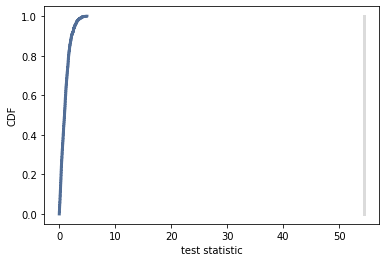

In [12]:
ht.PlotCdf()
thinkplot.Config(xlabel='test statistic',
                   ylabel='CDF')

In [13]:
class DiffMeansOneSided(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.mean() - group2.mean()
        return test_stat

In [14]:
ht = DiffMeansOneSided(data)
pvalue = ht.PValue()
pvalue

0.0

<h2>All this calculations are not valid. Thinkstats library's mistake</h2>
## Folowing calculations are valid using scipy library

In [15]:
pop_samp1 = db_Pop.popularity.sample(500)
pop_samp2 = db_Pop.popularity.sample(500)

In [16]:
stats.ttest_ind(pop_samp1,pop_samp2)

Ttest_indResult(statistic=-0.008941420427864744, pvalue=0.9928676607270106)

T-test p value results for pop music samples

In [17]:
stat, p = stats.ttest_ind(pop_samp1, pop_samp2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions')
else:
    print('Different distributions')

Statistics=-0.009, p=0.993
Same distributions


In [18]:
movie_samle1 = db_Movie.popularity.sample(500)
movie_samle2 = db_Movie.popularity.sample(500)

In [19]:
stats.ttest_ind(movie_samle1, movie_samle2)

Ttest_indResult(statistic=0.5369005158161831, pvalue=0.5914560039272545)

T-test p value results for muvie music samples

In [20]:
stat, p = stats.ttest_ind(movie_samle1, movie_samle2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions')
else:
    print('Different distributions')

Statistics=0.537, p=0.591
Same distributions


In [21]:
stat, p = stats.ttest_ind(pop_samp1, movie_samle1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions')
else:
    print('Different distributions')

Statistics=78.265, p=0.000
Different distributions


In [22]:
stat, p = stats.ttest_ind(pop_samp2, movie_samle2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions')
else:
    print('Different distributions')

Statistics=79.574, p=0.000
Different distributions


T test between pop and movie music

## Difference in standard deviation

<h3>Hypothesis:Standard deviation for 'Pop' is lower that 'Movie' </h3>
<h3>    Null Hypothesis: Standard deviation for 'Pop' and 'Movie' is equal</h3>
<h3>    Alternative Hypothesis: Standard deviation for 'Movie' is lower that 'Pop' </h3>


In [23]:
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [24]:
ht = DiffStdPermute(data)
pvalue = ht.PValue()
print(pvalue)

1.0


But that's not statistically significant either.

In [25]:
from scipy.stats import ttest_1samp
import numpy as np

ages_mean = np.mean(db_Movie.popularity)

print(ages_mean)

tset, pval = ttest_1samp(db_Movie.popularity, 10)
print('pvalues', pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
    
   print("We are rejecting null hypothesis")
else:
    
  print("We are accepting null hypothesis")

12.132
pvalues 6.250276023742162e-07
We are rejecting null hypothesis


In [26]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind

stat, p = ttest_ind(db_Pop.popularity.sample(1000), db_Movie.popularity.sample(1000))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=113.749, p=0.000
Different distributions (reject H0)


In [27]:
db_read.genre[db_read.genre == 'Comedy'] = 1
db_read.genre[db_read.genre == 'Soundtrack'] =2
db_read.genre[db_read.genre =='Indie'] =3
db_read.genre[db_read.genre == 'Jazz'] =4
db_read.genre[db_read.genre == 'Pop'] =5
db_read.genre[db_read.genre == 'Electronic'] =6
db_read.genre[db_read.genre == "Children’s Music"] =7
db_read.genre[db_read.genre == 'Folk'] =8
db_read.genre[db_read.genre == 'Hip-Hop'] =9
db_read.genre[db_read.genre == 'Rock'] =10
db_read.genre[db_read.genre == 'Alternative'] =11
db_read.genre[db_read.genre == 'Classical'] =12
db_read.genre[db_read.genre =='Rap'] =13
db_read.genre[db_read.genre == 'World'] =14
db_read.genre[db_read.genre == 'Soul'] =15
db_read.genre[db_read.genre == 'R&B'] =16
db_read.genre[db_read.genre == 'Anime'] =17
db_read.genre[db_read.genre == 'Reggaeton'] =18
db_read.genre[db_read.genre == 'Ska'] =19
db_read.genre[db_read.genre == 'Reggae'] =20
db_read.genre[db_read.genre == 'Dance'] =21
db_read.genre[db_read.genre == 'Country'] =22
db_read.genre[db_read.genre =='Opera'] =23
db_read.genre[db_read.genre == 'Movie'] =24
db_read.genre[db_read.genre == "Children's Music"] =7
db_read.genre[db_read.genre == 'A Capella'] =25
db_read.genre[db_read.genre == 'Blues'] =26

C:\Users\asus.VENIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\asus.VENIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\asus.VENIK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\U

In [28]:
pop90 = db_read[db_read['popularity']>= 50]
pop0  = db_read[db_read['popularity'] < 50]

In [29]:
pop90.genre.value_counts()

5     9343
10    8935
13    8887
9     8301
21    7182
3     7137
7     7081
16    5070
11    4469
8     4276
15    3199
22    2786
18    1653
4     1507
6     1147
20    1015
14     751
26     707
2      463
19     419
12     399
17     129
24     123
1       26
23      12
Name: genre, dtype: int64

In [30]:
pop0.genre.value_counts()

1     9655
2     9183
12    8857
17    8807
19    8455
14    8345
26    8316
23    8268
6     8230
4     7934
20    7756
24    7683
7     7675
18    7274
15    5890
22    5878
8     5023
11    4794
16    3922
3     2406
21    1519
9      994
13     345
10     337
25     119
5       43
Name: genre, dtype: int64

In [31]:
# 12<Classical and 10> Rock

Classical_12 = pop0[pop0['genre'] == 12]
Rock_10 = pop90[pop90['genre'] == 10]


In [32]:
Classical_12

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
104033,12,Wolfgang Amadeus Mozart,"Concerto for Flute & Harp in C Major, K. 299: ...",32vorozGvLK6PPEpyysMKe,0,0.969000,0.2350,533320,0.02400,0.577000,F,0.0889,-27.534,Major,0.0433,93.723,4/4,0.1050
104034,12,Wolfgang Amadeus Mozart,"Clarinet Concerto in A Major, K. 622: II. Adagio",1xVoEzjTl55M37ugGDDeTm,0,0.979000,0.0768,439000,0.00800,0.060600,D,0.0940,-26.250,Major,0.0495,81.163,4/4,0.0654
104035,12,Wolfgang Amadeus Mozart,"Piano Sonata No. 11 in A Major, K. 331: III. A...",3v5OruWdyeFaEfgFSoSmvh,0,0.974000,0.5280,214096,0.18800,0.959000,A,0.1430,-16.671,Major,0.0557,126.705,4/4,0.8680
104036,12,Wolfgang Amadeus Mozart,"Oboe Concerto in C Major, K. 314: III. Allegro",0YYKh4qo4uH7UhKtgh6DVj,0,0.965000,0.4940,365200,0.18500,0.955000,C,0.0583,-18.148,Major,0.0461,117.663,4/4,0.6020
104037,12,Wolfgang Amadeus Mozart,"Violin Concerto No. 3 in G Major, K. 216: I. A...",1Fd6GlsIp1SUt7hTsEjOkc,0,0.944000,0.3690,540040,0.08190,0.465000,G,0.5920,-19.679,Major,0.0392,133.743,4/4,0.4230
104038,12,Wolfgang Amadeus Mozart,"Flute Quartet No. 1 in D Major, K. 285: I. All...",1qXkRw2lJjQ6xnJcBBF6Xr,0,0.971000,0.3880,411347,0.14700,0.896000,D,0.1390,-18.226,Major,0.0429,131.953,4/4,0.4100
104039,12,Wolfgang Amadeus Mozart,"Piano Sonata No. 16 in C Major, K. 545 ""Sonata...",07wpLlfWVtshuHi5dvafjx,0,0.995000,0.3590,354164,0.06550,0.857000,G,0.0809,-27.828,Major,0.0570,160.506,4/4,0.3700
104040,12,Wolfgang Amadeus Mozart,"Violin Concerto No. 3 in G Major, K. 216: II. ...",2vTrHWr8jsATELdw0s0Isp,0,0.896000,0.1150,524907,0.06080,0.260000,D,0.0972,-26.801,Major,0.0485,169.681,3/4,0.1110
104041,12,Wolfgang Amadeus Mozart,"Clarinet Quintet in A Major, Op. 108, K. 581: ...",48yFPoQUWUNB2bJTmQB9jb,0,0.988000,0.2480,553160,0.07090,0.354000,A,0.1360,-21.553,Major,0.0444,122.497,4/4,0.1710
104042,12,Wolfgang Amadeus Mozart,"Piano Concerto No. 23 in A Major, K. 488: II. ...",60i7X6YEDy43fwo7Jjo4jt,0,0.988000,0.2450,451867,0.01320,0.892000,F#,0.1200,-26.487,Minor,0.0358,80.901,3/4,0.0523


In [33]:
Rock_10

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
152988,10,Queen,We Are The Champions,4kzvAGJirpZ9ethvKZdJtg,50,0.230000,0.460,180667,0.482,0.000000,A#,0.1010,-7.413,Major,0.0285,94.975,3/4,0.2020
152989,10,Death Cab for Cutie,Black Sun,59FC22eN2Syt9bbv2d6393,55,0.170000,0.608,289160,0.642,0.066700,D,0.1660,-7.978,Major,0.0251,87.703,4/4,0.6080
152990,10,Demon Hunter,On My Side,3zlqFHiuLAUra9MsJ85l4v,59,0.000005,0.480,244387,0.953,0.066700,C#,0.0805,-5.061,Minor,0.0889,95.016,4/4,0.2680
152991,10,Carole King,Bitter With The Sweet,6bMrfP9V5s5fgL3Z02tcES,64,0.807000,0.691,148040,0.430,0.000508,G#,0.1150,-13.252,Major,0.0576,99.032,4/4,0.6900
152992,10,Tenth Avenue North,Worn,6jAAYLKxXPyeEoddXu6Gf7,54,0.384000,0.510,244120,0.420,0.000000,F#,0.1020,-8.014,Major,0.0312,125.898,4/4,0.1900
152993,10,Sublime With Rome,House Party,4dklLLlnPhtAznKMYGnmBc,51,0.016800,0.697,211427,0.799,0.007500,D,0.2150,-6.088,Major,0.0410,75.001,4/4,0.5350
152994,10,Elton John,Bennie And The Jets - Recorded At The Colosseu...,144y07SeEatHOBswM3BZHk,58,0.244000,0.520,361547,0.570,0.000707,C,0.3000,-6.606,Major,0.0377,133.047,4/4,0.5930
152995,10,Iration,Already Gold,5GrXshz0UGM1qP74PKHKOC,52,0.047100,0.728,261080,0.696,0.000018,G,0.0233,-6.084,Major,0.0632,78.002,4/4,0.6740
152996,10,Fall Out Boy,The Mighty Fall,49nmsafpkJp2lDj9b4jkxh,53,0.061200,0.511,212467,0.950,0.000000,E,0.2030,-3.833,Minor,0.1840,151.943,4/4,0.5390
152997,10,Foreign Air,Wake Me Up,0ionYKqaYZPg9FSwPlqqmr,56,0.010300,0.229,222760,0.915,0.471000,A#,0.1040,-4.939,Minor,0.0762,177.989,3/4,0.3050


In [34]:
print("Standard Deviation of pop sample 1 is % s " % (statistics.stdev(pop_samp1))) 

Standard Deviation of pop sample 1 is 6.944762303124117 


In [35]:
print("Standard Deviation of pop sample 2 is % s " % (statistics.stdev(pop_samp2))) 

Standard Deviation of pop sample 2 is 7.199588053234195 


In [36]:
print("Standard Deviation of movie sample 1 is % s " % (statistics.stdev(pop_samp1))) 

Standard Deviation of movie sample 1 is 6.944762303124117 


In [37]:
print("Standard Deviation of movie sample 2 is % s " % (statistics.stdev(pop_samp1))) 

Standard Deviation of movie sample 2 is 6.944762303124117 


Stds for or samples divided by popularity rates

## Testing correlation

To check whether an observed correlation is statistically significant, we can run a permutation test with a different test statistic.

In [38]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

Testing the correlation

In [39]:

ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.698

The p-value is between 0.5 and 0.7 for pop and movie music

In [40]:
ht.actual, ht.MaxTestStat()

(0.011076849980779855, 0.10653238568019346)

## Chi-square test

In [41]:
class PregLengthTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        firsts, others = data
        stat = self.ChiSquared(firsts) + self.ChiSquared(others)
        return stat

    def ChiSquared(self, lengths):
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat

If we specifically test the deviations of  pop and movies samles, the results are statistically significant with a very small p-value. 

In [42]:
data = db_Pop.popularity.values, db_Movie.popularity.values
ht = PregLengthTest(data)
p_value = ht.PValue()
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())

p-value = 0.0
actual = 45.8
ts max = 26.00952380952381


In [43]:
stats.chisquare(pop_samp1)

Power_divergenceResult(statistic=362.68961359937316, pvalue=0.9999990498695082)

In [44]:
stats.chisquare(pop_samp2)

Power_divergenceResult(statistic=389.7709463532249, pvalue=0.9999029048724841)

In [45]:
stats.chisquare(movie_samle1)

Power_divergenceResult(statistic=7554.6551724137935, pvalue=0.0)

In [46]:
stats.chisquare(movie_samle2)

Power_divergenceResult(statistic=7539.637574950034, pvalue=0.0)